In [1]:
!pip3 install -r requirements.txt
!python3 -m pip install \
                --config-settings="--global-option=build_ext" \
                --config-settings="--global-option=-I$(brew --prefix graphviz)/include/" \
                --config-settings="--global-option=-L$(brew --prefix graphviz)/lib/" \
                pygraphviz

  Using cached neo4j-5.21.0-py3-none-any.whl.metadata (5.7 kB)
Using cached neo4j-5.21.0-py3-none-any.whl (286 kB)


# Turn a book into a knowledge graph

## Import Data

In [4]:
from langchain.document_loaders import PyPDFLoader

file_path = "/Users/rayanaay/Desktop/projects/langchain/RAG/data/CAMUS-Letranger.pdf"
book_loader = PyPDFLoader(file_path)
book_data = book_loader.load_and_split()

In [5]:
len(book_data)

89

## Create Graph Representation

In [29]:
from langchain.indexes import GraphIndexCreator
from langchain.llms import OpenAI


llm = OpenAI(temperature=0)
index_creator = GraphIndexCreator(llm=llm)
graph = index_creator.from_text(book_data[20].page_content + book_data[21].page_content)

In [30]:
graph.get_triples()

[('Albert Camus', "L'étranger", 'wrote'),
 ("L'étranger", 'novel', 'is a'),
 ("L'étranger", '1942', 'was published in'),
 ('Raymond', '20 francs per day', 'pays'),
 ('Raymond', 'rent', 'pays'),
 ('Raymond', 'coffee', 'takes'),
 ('Raymond', 'coffee and sugar', 'gives'),
 ('Raymond', 'money', 'gives'),
 ('Raymond', 'lottery ticket', 'found'),
 ('Raymond', 'indication of pawn shop', 'found'),
 ('Raymond', '2 bracelets', 'found'),
 ('Raymond', 'deception', 'discovered'),
 ('Raymond', 'her', 'beat'),
 ('Raymond', 'truth', 'told her'),
 ('Raymond', 'she only wanted to have fun', 'said'),
 ('Raymond', 'she was jealous of his happiness', 'said'),
 ('Raymond', 'for advice', 'asked'),
 ('Raymond', 'to punish her', 'wanted'),
 ('Raymond', 'to write a letter', 'wanted'),
 ('Raymond', 'to ask for help', 'wanted'),
 ('Raymond', 'Meursault for his opinio', 'asked')]

## Visualize the graph

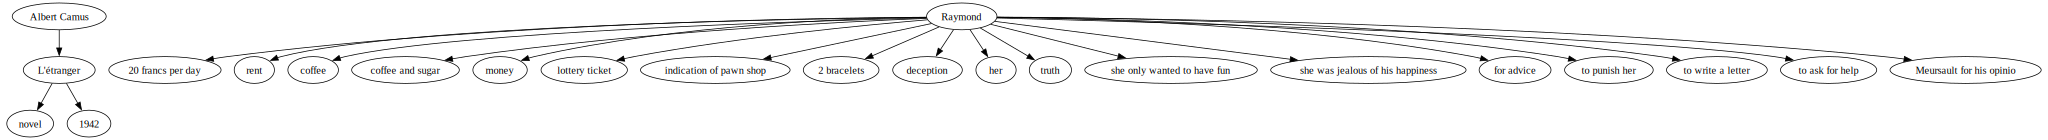

In [31]:
from IPython.display import SVG 
graph.draw_graphviz(path="book.svg")
SVG("book.svg")

In [41]:
graphs = [
    index_creator.from_text(doc.page_content)
    for doc in book_data[:30]
]

In [42]:
graphs[0]._graph.nodes

NodeView(('Albert Camus', "L'étranger", 'novel', '1942', 'two parts', 'Algeria', "the death of the narrator's mother", 'The narrator', 'a telegram', 'the bus', 'in the afternoon', 'for two days', 'two days off', "The narrator's boss", 'the request', "his boss it's not his fault", "he shouldn't have said that", 'his condolences', 'his condolences after the funeral', 'the bus)'))

In [43]:
len(graphs)

30

### Merge / compose graphs

We add to the initial graph, the next graph, we will have as result a complete graph that will be called a network

In [44]:
import networkx as nx 

graph_nx = graphs[0]._graph
for g in graphs[1:]:
    graph_nx = nx.compose(graph_nx, g._graph)

In [45]:
graph_nx

In [49]:
from langchain.graphs.networkx_graph import NetworkxEntityGraph

graph = NetworkxEntityGraph(graph_nx)
graph

In [50]:
graph.draw_graphviz(path="network.pdf")

In [51]:
graph.draw_graphviz(path="book.svg")
SVG("book.svg")